# Proximity and Accessibility analysis using Pandana

In this part, we will demonstrate how to perform proximity and accessibility analysis using the `pandana` library. The analysis will be carried out to one city: Delft.

In the next part, we will see how to scale this up to 9 cities.

## Set up environment

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # disable Pandana multithreading 
os.environ["USE_PYGEOS"] = "0"  # suppress geopandas warning

import pandana
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt

## Data Loading

We will load data from the following path on Spider: `/project/stursdat/Data/ScalableGIS/Part2/data_9_cities`. We use the `pathlib.Path` library to handle the path object.

In [2]:
from pathlib import Path

data_folder = Path("data")

In the `data_9_cities` folder, there are 9 folders for 9 Dutch cities. Within each city folder, there are `.shp` files for four componets of that city:

- **buildings**: building polygons
- **parks**: park polygons
- **nodes**: street network nodes
- **edges**: street network edges


In [3]:
# Check city folders in the data directory
[d for d in data_folder.glob('*')]

[PosixPath('data/Arnhem'),
 PosixPath('data/Amersfoort'),
 PosixPath('data/Nijmegen'),
 PosixPath('data/Breda'),
 PosixPath('data/Enschede'),
 PosixPath('data/Delft'),
 PosixPath('data/Leiden'),
 PosixPath('data/Gouda'),
 PosixPath('data/Deventer')]

In [6]:
# Check .shp files in the Delft folder
[d for d in data_folder.glob('Delft/*.shp')]

[PosixPath('data/Delft/parks_Delft.shp'),
 PosixPath('data/Delft/edges_Delft.shp'),
 PosixPath('data/Delft/buildings_Delft.shp'),
 PosixPath('data/Delft/nodes_Delft.shp')]

In [7]:
# For now we focus on the city Delft
city = 'Delft'

Then we load the four components of Delft

In [8]:
# Paths to the files
p_nodes = data_folder / city / "nodes_{}.shp".format(city)
p_edges = data_folder / city / "edges_{}.shp".format(city)
p_parks = data_folder / city / "parks_{}.shp".format(city)
p_buildings = data_folder / city / "buildings_{}.shp".format(city)

In [9]:
# Check if paths exist
for p in [p_nodes, p_edges, p_parks, p_buildings]:
    print(p.exists())

True
True
True
True


In [23]:
# load data with GeoPandas
nodes = gpd.read_file(p_nodes)
edges = gpd.read_file(p_edges)
parks = gpd.read_file(p_parks)
buildings = gpd.read_file(p_buildings)

In [24]:
nodes

,osmid,x,y,geometry
0,25315544,86125.744180,448869.146847,POINT (86125.744 448869.147)
1,25316215,85821.048377,448466.589356,POINT (85821.048 448466.589)
2,25316229,86299.010119,448536.556823,POINT (86299.010 448536.557)
3,25316232,86011.326910,448400.293879,POINT (86011.327 448400.294)
4,26017586,84648.883442,447335.586638,POINT (84648.883 447335.587)
...,...,...,...,...
9757,10882759562,83421.061707,444409.935584,POINT (83421.062 444409.936)
9758,10882759563,83421.575729,444442.419718,POINT (83421.576 444442.420)
9759,10885892864,83422.409210,445125.063536,POINT (83422.409 445125.064)
9760,10885892891,83431.407680,444929.117342,POINT (83431.408 444929.117)


In [25]:
edges

,u,v,key,length,geometry
0,25315544,493868196,0,30.991,"LINESTRING (86125.744 448869.147, 86106.344 44..."
1,25316215,1432937725,0,87.869,"LINESTRING (85821.048 448466.589, 85827.203 44..."
2,25316229,1271057030,0,206.947,"LINESTRING (86299.010 448536.557, 86295.641 44..."
3,25316229,302097504,0,25.239,"LINESTRING (86299.010 448536.557, 86304.549 44..."
4,25316229,302095241,0,25.849,"LINESTRING (86299.010 448536.557, 86291.946 44..."
...,...,...,...,...,...
26747,10885892864,9733120577,0,115.073,"LINESTRING (83422.409 445125.064, 83421.421 44..."
26748,10885892891,10885892892,0,7.328,"LINESTRING (83431.408 444929.117, 83424.056 44..."
26749,10885892892,9733120579,0,23.696,"LINESTRING (83424.056 444929.078, 83423.544 44..."
26750,10885892892,9733120575,0,16.168,"LINESTRING (83424.056 444929.078, 83424.336 44..."


In [19]:
# Set indexes for nodes and edges
nodes = nodes.set_index("osmid", drop=False)
edges = edges.set_index(["u", "v"], drop=False)

In [18]:
nodes

,osmid,x,y,geometry
0,25315544,86125.744180,448869.146847,POINT (86125.744 448869.147)
1,25316215,85821.048377,448466.589356,POINT (85821.048 448466.589)
2,25316229,86299.010119,448536.556823,POINT (86299.010 448536.557)
3,25316232,86011.326910,448400.293879,POINT (86011.327 448400.294)
4,26017586,84648.883442,447335.586638,POINT (84648.883 447335.587)
...,...,...,...,...
9757,10882759562,83421.061707,444409.935584,POINT (83421.062 444409.936)
9758,10882759563,83421.575729,444442.419718,POINT (83421.576 444442.420)
9759,10885892864,83422.409210,445125.063536,POINT (83422.409 445125.064)
9760,10885892891,83431.407680,444929.117342,POINT (83431.408 444929.117)


In [14]:
edges

u            v  key   length   
u           v                                                     
25315544    493868196       25315544    493868196    0   30.991  \
25316215    1432937725      25316215   1432937725    0   87.869   
25316229    1271057030      25316229   1271057030    0  206.947   
            302097504       25316229    302097504    0   25.239   
            302095241       25316229    302095241    0   25.849   
...                              ...          ...  ...      ...   
10885892864 9733120577   10885892864   9733120577    0  115.073   
10885892891 10885892892  10885892891  10885892892    0    7.328   
10885892892 9733120579   10885892892   9733120579    0   23.696   
            9733120575   10885892892   9733120575    0   16.168   
            10885892891  10885892892  10885892891    0    7.328   

                                                                  geometry  
u           v                                                               
25315544    493868196    LINESTRING (86125.744 448869.147, 86106.344 44...  
25316215    1432937725   LINESTRING (85821.048 448466.589, 85827.203 44...  
25316229    1271057030   LINESTRING (86299.010 448536.557, 86295.641 44...  
            302097504    LINESTRING (86299.010 448536.557, 86304.549 44...  
            302095241    LINESTRING (86299.010 448536.557, 86291.946 44...  
...                                                                    ...  
10885892864 9733120577   LINESTRING (83422.409 445125.064, 83421.421 44...  
10885892891 10885892892  LINESTRING (83431.408 444929.117, 83424.056 44...  
10885892892 9733120579   LINESTRING (83424.056 444929.078, 83423.544 44...  
            9733120575   LINESTRING (83424.056 444929.078, 83424.336 44...  
            10885892891  LINESTRING (83424.056 444929.078, 83431.408 44...  

[26752 rows x 5 columns]

In [20]:
# setup a network
network = pandana.Network(
    node_x=nodes["x"], 
    node_y=nodes["y"], 
    edge_from=edges["u"], 
    edge_to=edges["v"], 
    edge_weights=edges[["length"]],
)

Generating contraction hierarchies with 1 threads.
Setting CH node vector of size 9762
Setting CH edge vector of size 27352
Range graph removed 28274 edges of 54704
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

## Proximity analysis 

In [50]:
# add point of interests to network
network.set_pois(
    category="parks",
    maxdist=1000,
    maxitems=25,
    x_col=parks.centroid.x,
    y_col=parks.centroid.y,
)

In [51]:
# for all nodes, find 3 closest parks within 800m
proximity = network.nearest_pois(
    distance=8000,
    category="parks",
    num_pois=3,
    include_poi_ids=False
)

In [57]:
network.node_ids

Index([   25315544,    25316215,    25316229,    25316232,    26017586,
          26113712,    26485706,    26485722,    26485759,    26485760,
       ...
       10882759557, 10882759558, 10882759559, 10882759560, 10882759561,
       10882759562, 10882759563, 10885892864, 10885892891, 10885892892],
      dtype='int64', name='osmid', length=9762)

In [52]:
proximity.describe()

,1,2,3
count,9762.000000,9762.000000,9762.000000
mean,79.657918,124.750719,159.402752
std,78.432076,91.351306,99.708262
min,0.000000,0.000000,0.000000
25%,21.360000,60.259250,90.948748
50%,61.890999,109.374500,143.517502
75%,113.782747,169.031254,209.295246
max,800.000000,800.000000,800.000000


## Accessibility analysis

In [53]:
# add target points to network
node_ids = network.get_node_ids(parks.centroid.x, y_col=parks.centroid.y)
network.set(node_ids, name="parks")

In [54]:
# for all nodes, find how many parks fall within 800m
accessibility = network.aggregate(
    distance=800,
    type="count",
    name="parks"
)

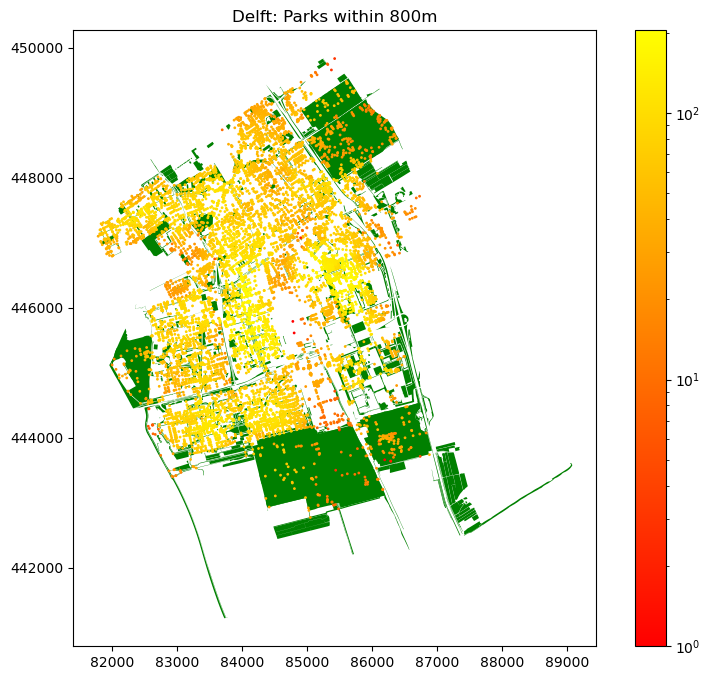

In [55]:
# visualize nodes using accessibility
fig, ax = plt.subplots(1, 1, figsize=(10,8))
plt.title('Delft: Parks within 800m')
parks.plot(
    ax=ax,
    color="green"
)
plt.scatter(
    nodes["x"], 
    nodes["y"], 
    c=accessibility, 
    s=1, 
    cmap='autumn', 
    norm=matplotlib.colors.LogNorm()
)
cb = plt.colorbar()

In [19]:
# assign accessibility of buildings using closest nodes 
node_ids = network.get_node_ids(
    x_col=buildings.centroid.x, 
    y_col=buildings.centroid.y
)
buildings["accessibility"] = node_ids.map(accessibility.to_dict())

<Axes: title={'center': 'Delft: Parks within 800m'}>

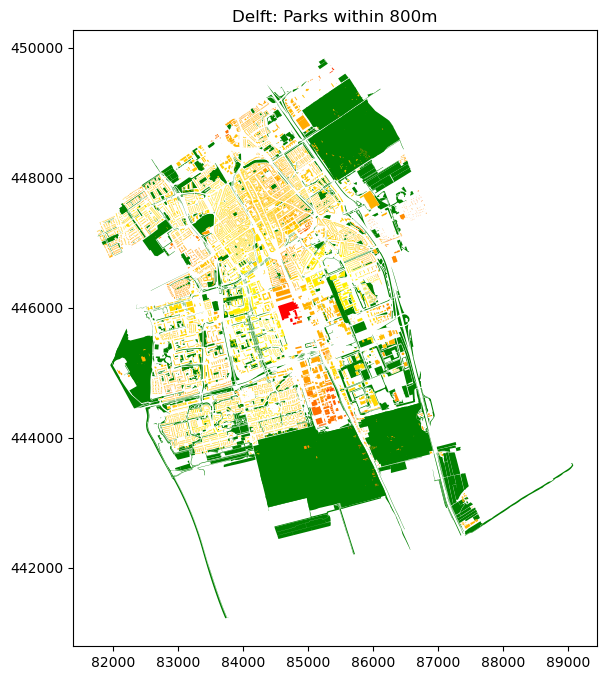

In [20]:
# visualize buildings using accessibility
fig, ax = plt.subplots(1, 1, figsize=(10,8))
plt.title('Delft: Parks within 800m')
parks.plot(
    ax=ax,
    color="green"
)
buildings.plot(
    ax=ax,
    column="accessibility",  
    cmap="autumn",
    norm=matplotlib.colors.LogNorm(),
    figsize=(10,8),
)